In [3]:
%%capture
import os
import sys
import random
import numpy as np
import pandas as pd
import cv2
from keras.preprocessing.image import img_to_array
try:
    from imutils import paths
except ImportError:
    !pip install imutils
    from imutils import paths
    
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# ea
train_df = pd.read_csv("train.csv") 
test_df = pd.read_csv("test.csv") 
print(train_df.head(5))

        id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0


In [7]:
diagnosis = list(train_df.diagnosis.unique())
print(diagnosis)

[2, 4, 1, 0, 3]


0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64


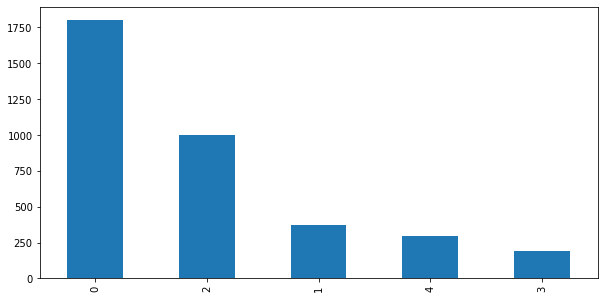

In [8]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
counts = train_df["diagnosis"].value_counts()
print(counts)
counts.plot(kind='bar', ax=ax1)

In [55]:
# get random images from each class and display
columns = 2
classes = {
    "zero": list(train_df.loc[train_df["diagnosis"] == 0].sample(n=columns).id_code),
    "one": list(train_df.loc[train_df["diagnosis"] == 1].sample(n=columns).id_code),
    "two": list(train_df.loc[train_df["diagnosis"] == 2].sample(n=columns).id_code),
    "three": list(train_df.loc[train_df["diagnosis"] == 3].sample(n=columns).id_code),
    "four": list(train_df.loc[train_df["diagnosis"] == 4].sample(n=columns).id_code)
}
"""
zero = train_df.loc[train_df["diagnosis"] == 0].sample(n=columns)
zero.name = "0"
one = train_df.loc[train_df["diagnosis"] == 1].sample(n=columns)
one.name = "1"
two = train_df.loc[train_df["diagnosis"] == 2].sample(n=columns)
two.name = "2"
three = train_df.loc[train_df["diagnosis"] == 3].sample(n=columns)
three.name = "3"
four = train_df.loc[train_df["diagnosis"] == 4].sample(n=columns)
four.name = "4"
"""
print(classes)

{'zero': ['2c8101f14723', 'c90c6b94cf40'], 'one': ['259d30f693b6', '677f087cd697'], 'two': ['a8e08e7fe016', '18f1f979d30d'], 'three': ['c5a9ebef1517', '2f42e20db938'], 'four': ['3a6e9730b298', 'f8cf7ed8ef00']}


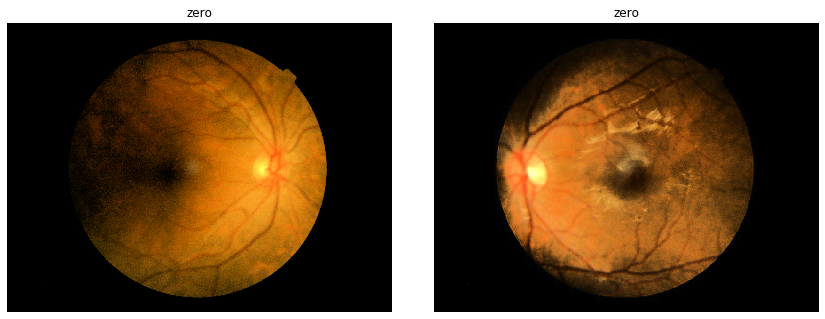

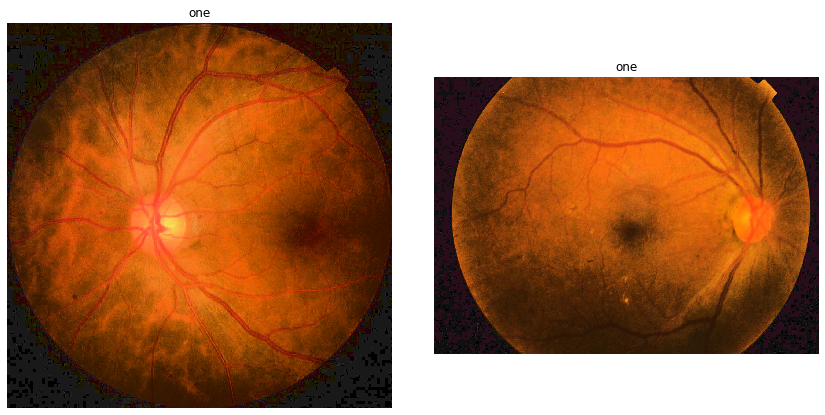

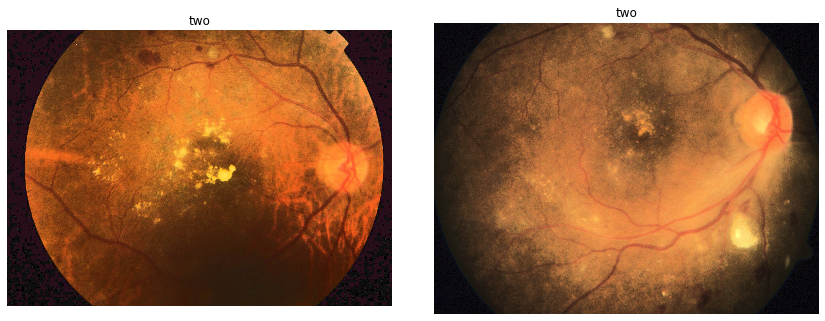

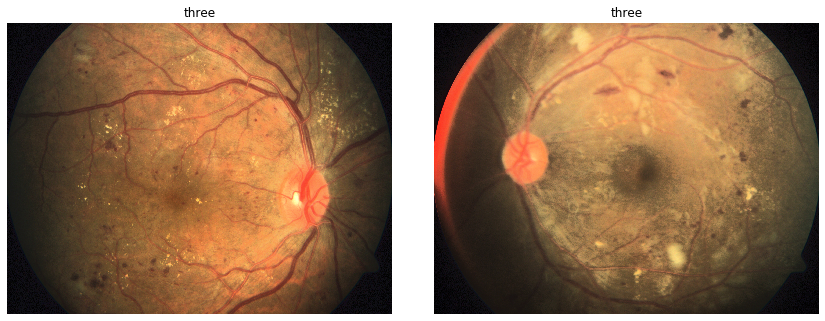

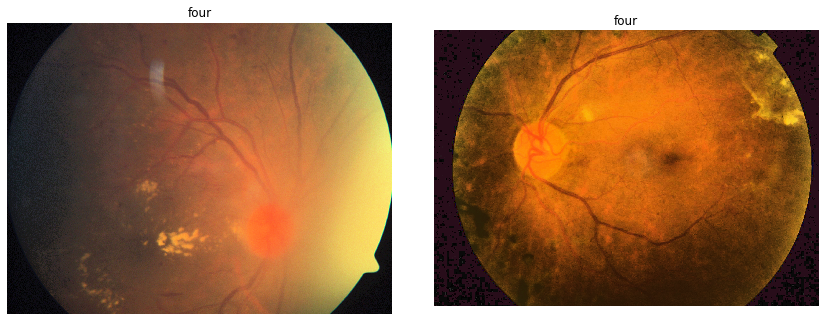

In [56]:
def preprocess(image, input_mode="grayscale"):
    img = image
    # convert to uint8 watch out after new definition
    # img = image.astype(np.uint8)
    # if the image is of bgr then equalize each channel and join back
    if input_mode == "bgr":
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        H, S, V = cv2.split(img)
        _V = cv2.equalizeHist(V)
        img = cv2.merge([H, S, _V])
        img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
    # if grayscale image
    elif input_mode == "grayscale":
        img = cv2.equalizeHist(img)
    return img

# this method displays images for two classes above and below
def display(classes, columns, cmap=None):
    for _class in classes:
        #print(random_images)
        fig, axes = plt.subplots(nrows=1, ncols=columns, figsize=(12, 10), squeeze=False)
        fig.tight_layout()
        for l in range(1):
            for m, img in enumerate(classes[_class]):
                image = preprocess(cv2.imread("train_images/{}.png".format(img)), input_mode="bgr")
                axes[l][m].imshow(image, cmap=cmap)
                axes[l][m].axis("off")
                axes[l][m].set_title(_class)
    # done displaying
    
# display images
display(classes, columns)